In [2]:
import pandas as pd
import utils
from importlib import reload
import utils
reload(utils)
import seaborn as sns
import scipy.stats as stats

In [3]:
file = 'phone_dist_data/UN_human_rights_germanic.csv'

In [27]:
df_ortho = pd.read_csv(file)

## orthographic distance

In [28]:
df_ortho.head()

,Article,English,German,Swedish
0,1,All human beings are born free and equal in di...,Alle Menschen sind frei und gleich an Würde un...,Alla människor är födda fria och lika i värde ...
1,2,Everyone is entitled to all the rights and fre...,Jeder hat Anspruch auf alle in dieser Erklärun...,Var och en är berättigad till alla de rättighe...
2,3,"Everyone has the right to life, liberty and se...","Jeder hat das Recht auf Leben, Freiheit und Si...","Var och en har rätt till liv, frihet och perso..."
3,4,No one shall be held in slavery or servitude; ...,Niemand darf in Sklaverei oder Leibeigenschaft...,Ingen får hållas i slaveri eller träldom; slav...
4,5,No one shall be subjected to torture or to cru...,"Niemand darf der Folter oder grausamer, unmens...","Ingen får utsättas för tortyr eller grym, omän..."


##### Clean data

In [116]:
def clean_string(s):
    s = s.lower().strip()
    for symbol in [" ", ",", ".", "", "1", "2","3", "/"]:
        s = s.replace(symbol, "")
    return s

In [121]:
df_ortho.English = df_ortho.English.apply(clean_string)
df_ortho.German = df_ortho.German.apply(clean_string)
df_ortho.Swedish = df_ortho.Swedish.apply(clean_string)

##### Get distance

In [122]:
df_ortho['orth_dist_en_de'] = 0
df_ortho['orth_dist_en_se'] = 0
df_ortho['orth_dist_de_se'] = 0
for i in range(len(df_ortho)):
    df_ortho['orth_dist_en_de'].iloc[i] = utils.normalized_edit_distance(df_ortho.English[i], df_ortho.German[i])
    df_ortho['orth_dist_en_se'].iloc[i] = utils.normalized_edit_distance(df_ortho.English[i], df_ortho.Swedish[i])
    df_ortho['orth_dist_de_se'].iloc[i] = utils.normalized_edit_distance(df_ortho.Swedish[i], df_ortho.German[i])

In [123]:
df_ortho.head()

,Article,English,German,Swedish,orth_dist_en_de,orth_dist_en_se,orth_dist_de_se
0,1,allhumanbeingsarebornfreeandequalindignityandr...,allemenschensindfreiundgleichanwürdeundrechten...,allamänniskorärföddafriaochlikaivärdeochrättig...,0.746377,0.792593,0.776119
1,2,everyoneisentitledtoalltherightsandfreedomsset...,jederhatanspruchaufalleindiesererklärungverkün...,varochenärberättigadtillalladerättigheterochfr...,0.730159,0.740385,0.751648
2,3,everyonehastherighttolifelibertyandsecurityofp...,jederhatdasrechtauflebenfreiheitundsicherheitd...,varochenharrätttilllivfrihetochpersonligsäkerhet,0.628571,0.767677,0.764706
3,4,nooneshallbeheldinslaveryorservitude;slaveryan...,niemanddarfinsklavereioderleibeigenschaftgehal...,ingenfårhållasislaveriellerträldom;slaveriochs...,0.768473,0.640449,0.771574
4,5,nooneshallbesubjectedtotortureortocruelinhuman...,niemanddarfderfolterodergrausamerunmenschliche...,ingenfårutsättasförtortyrellergrymomänskligell...,0.833333,0.817073,0.691489


In [128]:
df_ortho.describe()

,Article,orth_dist_en_de,orth_dist_en_se,orth_dist_de_se
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,0.800210,0.780096,0.793883
std,8.803408,0.053291,0.055513,0.048046
min,1.000000,0.628571,0.640449,0.691489
25%,8.250000,0.771979,0.766546,0.769005
50%,15.500000,0.806063,0.790527,0.787233
75%,22.750000,0.832572,0.805432,0.829286
max,30.000000,0.892562,0.902655,0.887892


<Axes: >

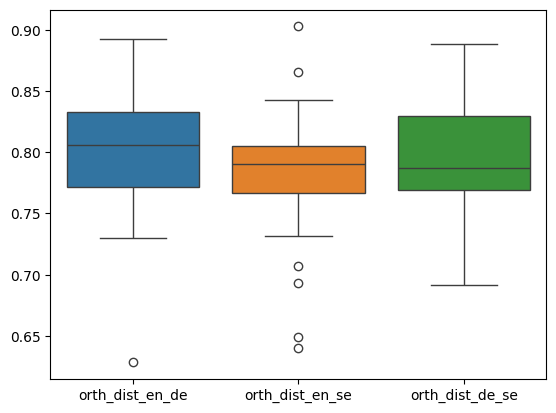

In [124]:
sns.boxplot(data = df_ortho[['orth_dist_en_de', 'orth_dist_en_se', 'orth_dist_de_se']])

<Axes: >

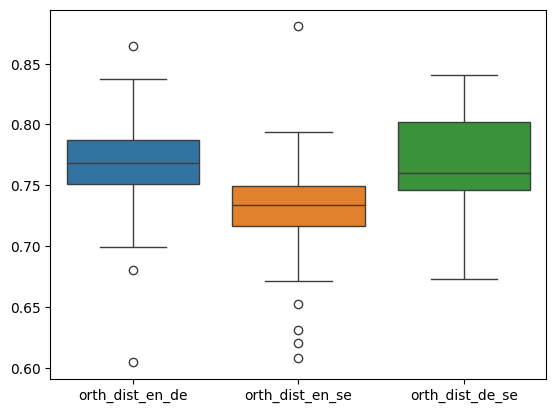

In [32]:
sns.boxplot(data = df_ortho[['orth_dist_en_de', 'orth_dist_en_se', 'orth_dist_de_se']])

In [125]:
stats.mannwhitneyu(df_ortho.orth_dist_en_de, df_ortho.orth_dist_en_se)

MannwhitneyuResult(statistic=556.0, pvalue=0.11881734448329707)

In [126]:
stats.mannwhitneyu(df_ortho.orth_dist_en_de, df_ortho.orth_dist_de_se)

MannwhitneyuResult(statistic=501.0, pvalue=0.4552969069031376)

In [127]:
stats.mannwhitneyu(df_ortho.orth_dist_en_se, df_ortho.orth_dist_de_se)

MannwhitneyuResult(statistic=421.0, pvalue=0.673495052801603)

In [26]:
df_ortho.to_excel('output/UN_human_rights_germanic_orthographic_distance.xlsx', index=False)

### Conclusion:
-   No significance in orthographic distance between the languages for the texts

## Get Ipa transcriptions

In [28]:
df_phon = pd.read_csv('phone_dist_data/UN_human_rights_germanic.csv')

In [ ]:
#takes ca 10 min
df_phon['English_ipa'] = 0
df_phon['German_ipa'] = 0
df_phon['Swedish_ipa'] = 0
for i in range(len(df_phon)):
    df_phon['English_ipa'].iloc[i] = utils.get_ipa_openai(df_phon.English[i])
    df_phon['German_ipa'].iloc[i] = utils.get_ipa_openai(df_phon.German[i])
    df_phon['Swedish_ipa'].iloc[i] = utils.get_ipa_openai(df_phon.Swedish[i])
    

In [ ]:
df_phon[['English_ipa', 'German_ipa', 'Swedish_ipa']]

,English_ipa,German_ipa,Swedish_ipa
0,/ɔːl ˈhjuːmən ˈbiːɪŋz ɑːr bɔːrn friː ænd ˈiːkw...,/ˈalə ˈmɛnʃən zɪnt fraɪ ʊnt ɡlaiç an ˈvʏrdə ʊn...,/ˈalːa ˈmɛnːɪskʊr ɛr ˈfœdːa ˈfrɪːa ɔk ˈliːka i...
1,/ˈɛvrɪwʌn ɪz ɪnˈtaɪtəld tuː ɔːl ðə raɪts ænd ˈ...,/ˈjeːdɐ hat ˈanʃpraʊx aʊf ˈalə ɪn ˈdɪzɐ ɛrˈklɛ...,/ˈvar ɔk ˈɛn ɛr bɛˈrɛtːɪɡad tɪl ˈalːa dɛ ˈrɛtː...
2,"/ˈɛvrɪwʌn hæz ðə raɪt tu laɪf, ˈlɪbərti ænd sɪ...","/ˈjeːdɐ hat das ʁɛçt aʊf ˈliːbən, ˈfʁaɪhaɪt ʊn...","/ˈvar ɔk ˈɛn har rɛt til liːv, ˈfriːhɛt ɔk pɛr..."
3,/noʊ wʌn ʃæl bi hɛld ɪn ˈsleɪvəri ɔr ˈsɜrvɪˌtu...,/ˈniːmant darf ɪn ˈʃlaːvəraɪ oːɐ̯ ˈlaɪ̯baɪ̯ɡən...,/ˈɪŋɛn fɔr ˈhɔlːas ɪ ˈslɑːvɛrɪ ɛlɛr ˈtrɛlːdʊm;...
4,/noʊ wʌn ʃæl bi səbˈdʒɛktɪd tu ˈtɔrtʃər ɔr tu ...,/ˈniːmant dɑrf deːɐ ˈfɔltɐ oːɐ ˈɡʁaʊzamɐ ˈʊnmɛ...,/ˈɪŋɛn fɔːr ²ɵtˌsɛtːas fœr tʊrˈtyːr ɛlɛr ²ɡryː...
5,/ˈɛvrɪwʌn hæz ðə raɪt tuː ˌrɛkəɡˈnɪʃən ˈɛvrɪwɛ...,/ˈjeːdɐ hat ˈyːbɐal ˈʔanˌʃprʊx aʊf ˌʔanɐˈkɛnʊŋ...,/ˈvɑːr ɔk ˈɛn har rɛt ɑt ˈœvɛrˌal ɛrkɛnˈnɑs sɔ...
6,/ɔl ɑr ˈikwəl bɪˈfɔr ðə lɔ ənd ɑr ɪnˈtaɪtəld w...,/ˈalə ˈmɛnʃən zɪnt foːɐ deːm ˈlɛts ɡlaɪç ʊnt ˈ...,/ˈalːa ær ˈliːka ˈɪnˌføːr ˈlɑːɡɛn ɔk har rɛtː ...
7,/ˈɛvrɪwʌn hæz ðə raɪt tuː ən ɪˈfɛktɪv ˈrɛmədi ...,/ˈjeːdɐ hat ˈanˌʃprʊç aʊf ˈaɪnən ˈvɪʁksamən ˈʁ...,/ˈvɑːr ɔk ˈɛn har rɛtː til ɛt ˈvæɾkˌsamt ˈrɛtː...
8,/noʊ wʌn ʃæl bi səbˈdʒɛktɪd tuː ˈɑːrbɪˌtrɛri ə...,"/ˈniːmant dɑrf ˈvɪlkœrliç ˈfɛstɡənɔmən, ɪn haf...","/ˈɪŋɛn fɔr ˈɡuːdʏkɛlɪt ˈanˌhɔlːas, ˈhɔlːas ˈfɛ..."
9,/ˈɛvrɪwʌn ɪz ɪnˈtaɪtəld ɪn fʊl ɪˈkwɒlɪti tuː ə...,/ˈjeːdɐ hat baɪ deːɐ fɛstˈʃtɛlʊŋ zɪnɐ ˈʁɛçtə ʊ...,/ˈvɑr ɔk ˈɛn ɛr ˈpɔ fɵlˈstɛnːdɪɡ ˈjɛmːlɪk fʊt ...


In [ ]:
df_phon[['English_ipa', 'German_ipa', 'Swedish_ipa']].to_csv('phone_dist_data/UN_human_rights_ipa_germanic.csv', index = False)

### Phonetic distance

In [10]:
df_phon = pd.read_csv('phone_dist_data/UN_human_rights_ipa_germanic.csv')

In [11]:
df_phon.head()

,Unnamed: 0,English_ipa,German_ipa,Swedish_ipa
0,0,/ɔːl ˈhjuːmən ˈbiːɪŋz ɑːr bɔːrn friː ænd ˈiːkw...,/ˈalə ˈmɛnʃən zɪnt fraɪ ʊnt ɡlaiç an ˈvʏrdə ʊn...,/ˈalːa ˈmɛnːɪskʊr ɛr ˈfœdːa ˈfrɪːa ɔk ˈliːka i...
1,1,/ˈɛvrɪwʌn ɪz ɪnˈtaɪtəld tuː ɔːl ðə raɪts ænd ˈ...,/ˈjeːdɐ hat ˈanʃpraʊx aʊf ˈalə ɪn ˈdɪzɐ ɛrˈklɛ...,/ˈvar ɔk ˈɛn ɛr bɛˈrɛtːɪɡad tɪl ˈalːa dɛ ˈrɛtː...
2,2,"/ˈɛvrɪwʌn hæz ðə raɪt tu laɪf, ˈlɪbərti ænd sɪ...","/ˈjeːdɐ hat das ʁɛçt aʊf ˈliːbən, ˈfʁaɪhaɪt ʊn...","/ˈvar ɔk ˈɛn har rɛt til liːv, ˈfriːhɛt ɔk pɛr..."
3,3,/noʊ wʌn ʃæl bi hɛld ɪn ˈsleɪvəri ɔr ˈsɜrvɪˌtu...,/ˈniːmant darf ɪn ˈʃlaːvəraɪ oːɐ̯ ˈlaɪ̯baɪ̯ɡən...,/ˈɪŋɛn fɔr ˈhɔlːas ɪ ˈslɑːvɛrɪ ɛlɛr ˈtrɛlːdʊm;...
4,4,/noʊ wʌn ʃæl bi səbˈdʒɛktɪd tu ˈtɔrtʃər ɔr tu ...,/ˈniːmant dɑrf deːɐ ˈfɔltɐ oːɐ ˈɡʁaʊzamɐ ˈʊnmɛ...,/ˈɪŋɛn fɔːr ²ɵtˌsɛtːas fœr tʊrˈtyːr ɛlɛr ²ɡryː...


In [12]:
df_phon = df_phon.drop(columns = ['Unnamed: 0'])

Clean the texts

In [129]:
df_phon.English_ipa = df_phon.English_ipa.apply(clean_string)
df_phon.German_ipa = df_phon.German_ipa.apply(clean_string)
df_phon.Swedish_ipa = df_phon.Swedish_ipa.apply(clean_string)

In [130]:
df_phon["phon_dist_en_de"] = 0
df_phon['phon_dist_en_se'] = 0
df_phon['phon_dist_de_se'] = 0
for i in range(len(df_phon)):
    df_phon['phon_dist_en_de'].iloc[i] = utils.normalized_edit_distance(df_phon.English_ipa[i], df_phon.German_ipa[i])
    df_phon['phon_dist_en_se'].iloc[i] = utils.normalized_edit_distance(df_phon.English_ipa[i], df_phon.Swedish_ipa[i])
    df_phon['phon_dist_de_se'].iloc[i] = utils.normalized_edit_distance(df_phon.Swedish_ipa[i], df_phon.German_ipa[i])

In [131]:
df_phon.head()

,English_ipa,German_ipa,Swedish_ipa,phon_dist_en_de,phon_dist_en_se,phon_dist_de_se
0,ɔːlˈhjuːmənˈbiːɪŋzɑːrbɔːrnfriːændˈiːkwəlɪnˈdɪɡ...,ˈaləˈmɛnʃənzɪntfraɪʊntɡlaiçanˈvʏrdəʊntˈrɪçtənɡ...,ˈalːaˈmɛnːɪskʊrɛrˈfœdːaˈfrɪːaɔkˈliːkaiˈvɛrːdɛɔ...,0.866197,0.863014,0.815068
1,ˈɛvrɪwʌnɪzɪnˈtaɪtəldtuːɔːlðəraɪtsændˈfriːdəmzs...,ˈjeːdɐhatˈanʃpraʊxaʊfˈaləɪnˈdɪzɐɛrˈklɛːrʊŋfɛɐˈ...,ˈvarɔkˈɛnɛrbɛˈrɛtːɪɡadtɪlˈalːadɛˈrɛtːɪhɛtɛrɔkˈ...,0.920086,0.812500,0.870103
2,ˈɛvrɪwʌnhæzðəraɪttulaɪfˈlɪbərtiændsɪˈkjʊrətiʌv...,ˈjeːdɐhatdasʁɛçtaʊfˈliːbənˈfʁaɪhaɪtʊntziˈçɐhaɪ...,ˈvarɔkˈɛnharrɛttilliːvˈfriːhɛtɔkpɛrˈsɔnliːˈsɛk...,0.875000,0.849057,0.800000
3,noʊwʌnʃælbihɛldɪnˈsleɪvəriɔrˈsɜrvɪˌtud;ˈsleɪvə...,ˈniːmantdarfɪnˈʃlaːvəraɪoːɐ̯ˈlaɪ̯baɪ̯ɡənʃaftɡə...,ˈɪŋɛnfɔrˈhɔlːasɪˈslɑːvɛrɪɛlɛrˈtrɛlːdʊm;ˈslɑːvɛ...,0.885714,0.778947,0.834862
4,noʊwʌnʃælbisəbˈdʒɛktɪdtuˈtɔrtʃərɔrtukruːəlɪnˈh...,ˈniːmantdɑrfdeːɐˈfɔltɐoːɐˈɡʁaʊzamɐˈʊnmɛnʃlɪçɐo...,ˈɪŋɛnfɔːr²ɵtˌsɛtːasfœrtʊrˈtyːrɛlɛr²ɡryːm²ʊˈmɛn...,0.920635,0.928962,0.871287


In [132]:
df_phon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   English_ipa      30 non-null     object 
 1   German_ipa       30 non-null     object 
 2   Swedish_ipa      30 non-null     object 
 3   phon_dist_en_de  30 non-null     float64
 4   phon_dist_en_se  30 non-null     float64
 5   phon_dist_de_se  30 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.5+ KB


In [135]:
df_phon.describe()

,phon_dist_en_de,phon_dist_en_se,phon_dist_de_se
count,30.000000,30.000000,30.000000
mean,0.901802,0.862984,0.865448
std,0.028927,0.029918,0.030363
min,0.830835,0.778947,0.800000
25%,0.875269,0.846610,0.843100
50%,0.906112,0.864273,0.868106
75%,0.922019,0.881079,0.885734
max,0.967480,0.928962,0.913495


<Axes: >

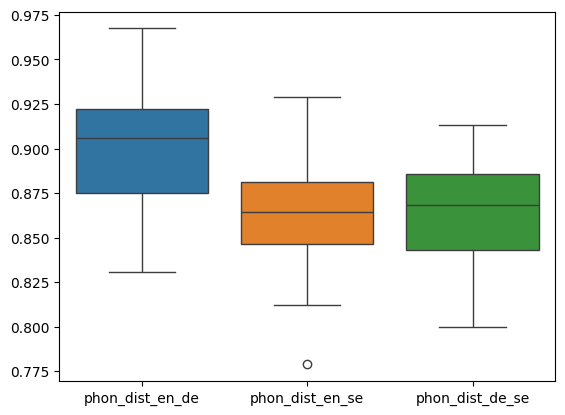

In [134]:
sns.boxplot(data = df_phon)

In [136]:
stats.mannwhitneyu(df_phon.phon_dist_en_de, df_phon.phon_dist_en_se)

MannwhitneyuResult(statistic=743.0, pvalue=1.5291673925716366e-05)

In [137]:
stats.mannwhitneyu(df_phon.phon_dist_en_de, df_phon.phon_dist_de_se)

MannwhitneyuResult(statistic=727.0, pvalue=4.350946203888879e-05)

In [138]:
stats.mannwhitneyu(df_phon.phon_dist_en_se, df_phon.phon_dist_de_se)

MannwhitneyuResult(statistic=427.0, pvalue=0.7393988193114496)

Conclusions:
-   Spoken English and german more different than spoken english and swedish, and spoken german and swedish.


### Comparing orthography and phonetics

In [143]:
df = df_ortho.join(df_phon)

In [144]:
df.head()

,Article,English,German,Swedish,orth_dist_en_de,orth_dist_en_se,orth_dist_de_se,English_ipa,German_ipa,Swedish_ipa,phon_dist_en_de,phon_dist_en_se,phon_dist_de_se
0,1,allhumanbeingsarebornfreeandequalindignityandr...,allemenschensindfreiundgleichanwürdeundrechten...,allamänniskorärföddafriaochlikaivärdeochrättig...,0.746377,0.792593,0.776119,ɔːlˈhjuːmənˈbiːɪŋzɑːrbɔːrnfriːændˈiːkwəlɪnˈdɪɡ...,ˈaləˈmɛnʃənzɪntfraɪʊntɡlaiçanˈvʏrdəʊntˈrɪçtənɡ...,ˈalːaˈmɛnːɪskʊrɛrˈfœdːaˈfrɪːaɔkˈliːkaiˈvɛrːdɛɔ...,0.866197,0.863014,0.815068
1,2,everyoneisentitledtoalltherightsandfreedomsset...,jederhatanspruchaufalleindiesererklärungverkün...,varochenärberättigadtillalladerättigheterochfr...,0.730159,0.740385,0.751648,ˈɛvrɪwʌnɪzɪnˈtaɪtəldtuːɔːlðəraɪtsændˈfriːdəmzs...,ˈjeːdɐhatˈanʃpraʊxaʊfˈaləɪnˈdɪzɐɛrˈklɛːrʊŋfɛɐˈ...,ˈvarɔkˈɛnɛrbɛˈrɛtːɪɡadtɪlˈalːadɛˈrɛtːɪhɛtɛrɔkˈ...,0.920086,0.812500,0.870103
2,3,everyonehastherighttolifelibertyandsecurityofp...,jederhatdasrechtauflebenfreiheitundsicherheitd...,varochenharrätttilllivfrihetochpersonligsäkerhet,0.628571,0.767677,0.764706,ˈɛvrɪwʌnhæzðəraɪttulaɪfˈlɪbərtiændsɪˈkjʊrətiʌv...,ˈjeːdɐhatdasʁɛçtaʊfˈliːbənˈfʁaɪhaɪtʊntziˈçɐhaɪ...,ˈvarɔkˈɛnharrɛttilliːvˈfriːhɛtɔkpɛrˈsɔnliːˈsɛk...,0.875000,0.849057,0.800000
3,4,nooneshallbeheldinslaveryorservitude;slaveryan...,niemanddarfinsklavereioderleibeigenschaftgehal...,ingenfårhållasislaveriellerträldom;slaveriochs...,0.768473,0.640449,0.771574,noʊwʌnʃælbihɛldɪnˈsleɪvəriɔrˈsɜrvɪˌtud;ˈsleɪvə...,ˈniːmantdarfɪnˈʃlaːvəraɪoːɐ̯ˈlaɪ̯baɪ̯ɡənʃaftɡə...,ˈɪŋɛnfɔrˈhɔlːasɪˈslɑːvɛrɪɛlɛrˈtrɛlːdʊm;ˈslɑːvɛ...,0.885714,0.778947,0.834862
4,5,nooneshallbesubjectedtotortureortocruelinhuman...,niemanddarfderfolterodergrausamerunmenschliche...,ingenfårutsättasförtortyrellergrymomänskligell...,0.833333,0.817073,0.691489,noʊwʌnʃælbisəbˈdʒɛktɪdtuˈtɔrtʃərɔrtukruːəlɪnˈh...,ˈniːmantdɑrfdeːɐˈfɔltɐoːɐˈɡʁaʊzamɐˈʊnmɛnʃlɪçɐo...,ˈɪŋɛnfɔːr²ɵtˌsɛtːasfœrtʊrˈtyːrɛlɛr²ɡryːm²ʊˈmɛn...,0.920635,0.928962,0.871287


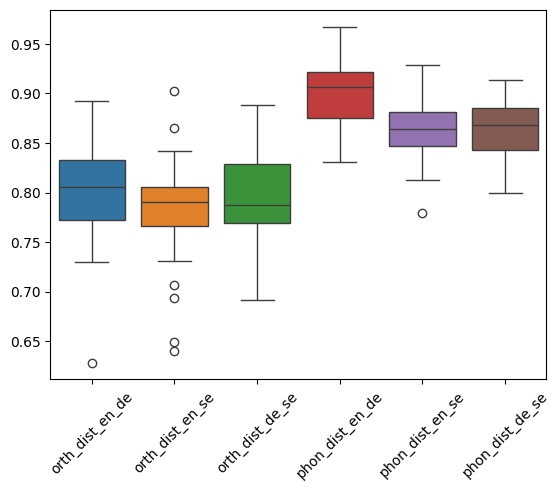

In [145]:
bx = sns.boxplot(data = df[['orth_dist_en_de', 'orth_dist_en_se', 'orth_dist_de_se', 'phon_dist_en_de', 'phon_dist_en_se', 'phon_dist_de_se']],)
bx.set_xticklabels(labels = ['orth_dist_en_de', 'orth_dist_en_se', 'orth_dist_de_se', 'phon_dist_en_de', 'phon_dist_en_se', 'phon_dist_de_se'], rotation = 45);

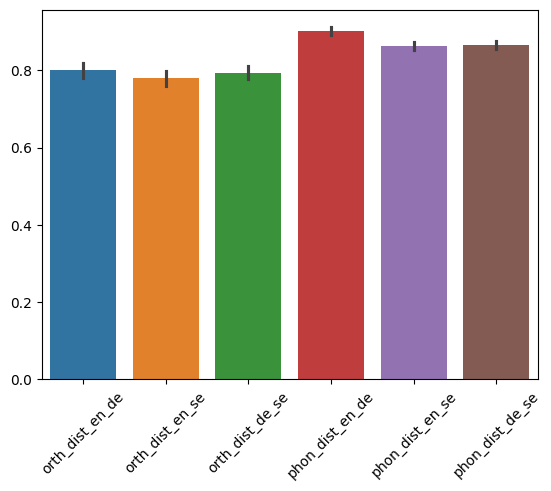

In [146]:
bx = sns.barplot(data = df[['orth_dist_en_de', 'orth_dist_en_se', 'orth_dist_de_se', 'phon_dist_en_de', 'phon_dist_en_se', 'phon_dist_de_se']],
                 ci=95)


bx.set_xticklabels(labels = ['orth_dist_en_de', 'orth_dist_en_se', 'orth_dist_de_se', 'phon_dist_en_de', 'phon_dist_en_se', 'phon_dist_de_se'], rotation = 45);

differences between orthographical and phonetical distance?

In [147]:
stats.mannwhitneyu(df.orth_dist_en_de, df.phon_dist_en_de)

MannwhitneyuResult(statistic=28.0, pvalue=4.6159103691111474e-10)

In [148]:
stats.mannwhitneyu(df.orth_dist_en_se, df.phon_dist_en_se)

MannwhitneyuResult(statistic=73.0, pvalue=2.6015113749963406e-08)

In [149]:
stats.mannwhitneyu(df.orth_dist_de_se, df.phon_dist_de_se)

MannwhitneyuResult(statistic=102.0, pvalue=2.782874101251223e-07)

Effectsizes: cohensD

create heatmaps

All differences significant at p > .001

### Conclusion:
- All languages are more similar in their written form than in their spoken form
- The largest difference lies between spoken english and german

### Outlook

Potential improvements:
-   Look at texts that are more reflective of the languages as a whole and diverese compared to the legal text human declaration of rights. -> could reduce bias of the LLM for context specific language proficiency as; would avoid bias in distance measurement due to similarities in use of words/formulations between the documents.

-   Add weighting to the calculating of edit distance based on how similar sounds are and if the ipa character represents a sound or a modification of a sound, such as aspirated and unaspirated; difference in stress etc.

